In [18]:
from collections import defaultdict

import utility
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import statistics 

In [19]:
input = {
    20: 'housing20time.csv',
    30: 'housing30time.csv',
    60: 'housing60time.csv',
    80: 'housing60time.csv'
}

numerosities = [20, 30, 60, 80]
numerosities_without_filters = [20, 30]
numerosities_with_filters = [60, 80]

family = utility.get_family_name()
generator_prior = utility.get_generator_prior()
filters, recommenders, vois, time = utility.read_input_files(input)

filters_without_all = filters
filters_without_all.remove(" All")

voiName = utility.get_voi_name()
filterName = utility.get_filter_name()
recName = utility.get_rec_name()

voiStyle = utility.get_voi_style()
filterStyle = utility.get_filter_style()
recStyle = utility.get_rec_style()

<IPython.core.display.Javascript object>


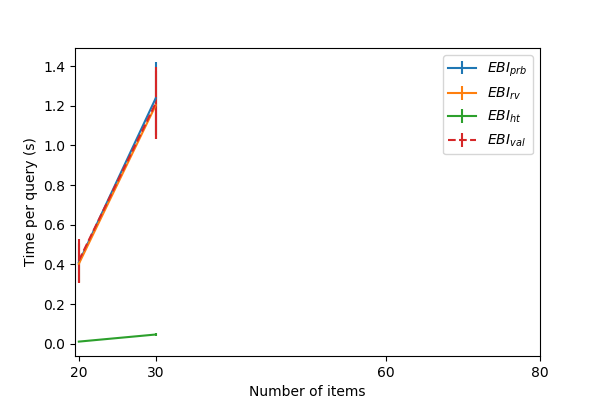

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


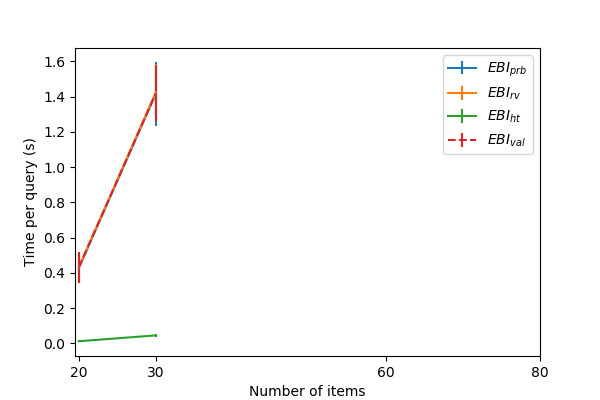

In [20]:
# Time graph on selectors (vois), no filter. One fig for recommender
filt=' All'
for recom in recommenders:
    fig = plt.figure(figsize=(6,4))
    ax = fig.subplots()
    for voi in vois:
        x_vals = []
        y_vals = []
        y_err = []
        for num in numerosities_without_filters:
            table = time[num]
            row = table[ (table['recommender'] == recom) & (table['filter'] == filt) & (table['selector'] == voi)]

            if not row.empty:
                x_vals.append(num)
                y_vals.append(row.iloc[0].average_time)
                y_err.append(row.iloc[0].stddev_time)

        ax.errorbar(x_vals, y_vals,  yerr=y_err, label=voiName[voi.strip()], linestyle=voiStyle[voi.strip()])        
        ax.set(xlabel='Number of items', xticks=list(numerosities), ylabel='Time per query (s)')

        ax.grid()
        ax.legend()
        plt.show()

    # Title of the Fig. 
    title = "time-fig-selector-time"+ "_All-" + recom + ".pdf"
    fig.savefig(title, pad_inches=0, bbox_inches='tight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


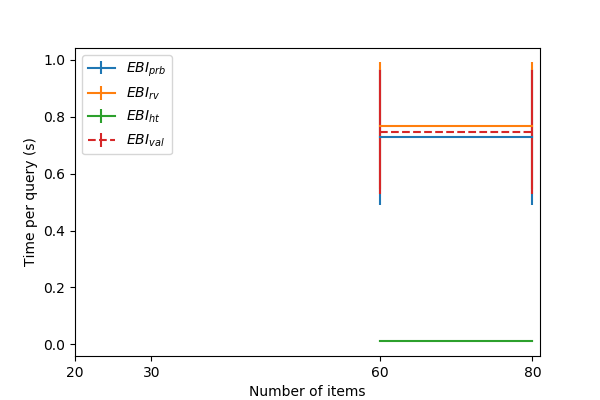

In [21]:
# Time graph on selectors (vois), with filter. One figure for couple of filter-recommender

for filt in filters_without_all:
    for recom in recommenders:
        fig = plt.figure(figsize=(6,4))
        ax = fig.subplots()
        for voi in vois:
            x_vals = []
            y_vals = []
            y_err = []
            for num in numerosities_with_filters:
                table = time[num]
                row = table[ (table['recommender'] == recom) & (table['filter'] == filt) & (table['selector'] == voi)]

                # print(row)
                if not row.empty:
                    x_vals.append(num)
                    y_vals.append(row.iloc[0].average_time)
                    y_err.append(row.iloc[0].stddev_time)

            ax.errorbar(x_vals, y_vals,  yerr=y_err, label=voiName[voi.strip()], linestyle=voiStyle[voi.strip()])        
            ax.set(xlabel='Number of items', xticks=list(numerosities), ylabel='Time per query (s)')

            ax.grid()
            ax.legend()
            plt.show()

        # Title of the Fig. 
        title = "time-fig-selector-time"+ "_" + filt +"-"+ recom + ".pdf"
        fig.savefig(title, pad_inches=0, bbox_inches='tight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


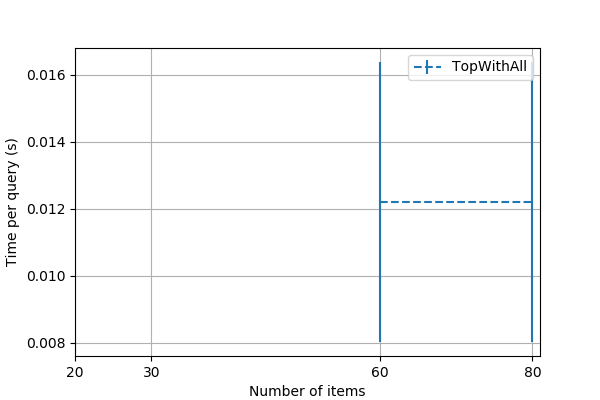

<IPython.core.display.Javascript object>


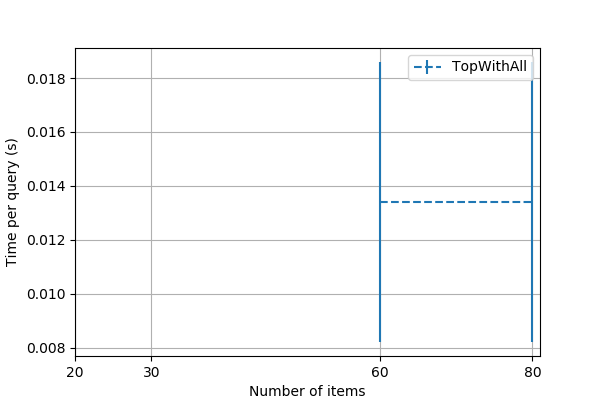

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


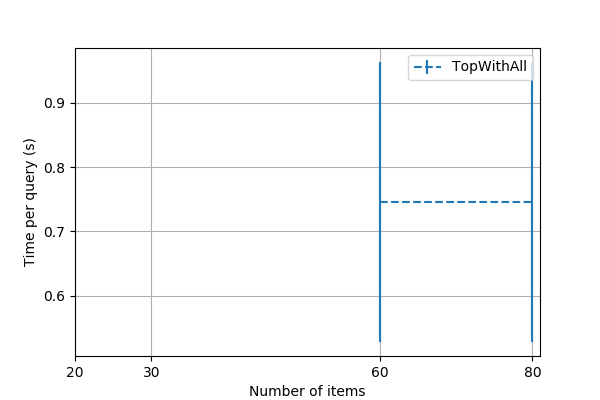

In [22]:
# Time graph on filters. One figure for couple of selector-recommender
for voi in vois:
    for recom in recommenders:
        fig = plt.figure(figsize=(6,4))
        ax = fig.subplots()
        for filt in filters:
            x_vals = []
            y_vals = []
            y_err = []
            for num in numerosities:
                table = time[num]
                row = table[ (table['recommender'] == recom) & (table['filter'] == filt) & (table['selector'] == voi)]
                # print(row)
                if not row.empty:
                    x_vals.append(num)
                    y_vals.append(row.iloc[0].average_time)
                    y_err.append(row.iloc[0].stddev_time)

            # ivoi = list(vois).index(voi) + 1
            ax.errorbar(x_vals, y_vals, yerr=y_err, label=filterName[filt.strip()], linestyle=filterStyle[filt.strip()])        
            ax.set(xlabel='Number of items', xticks=numerosities, ylabel='Time per query (s)')            
            ax.grid()
            ax.legend()
            plt.show()

        # Title of the Fig. 
        title = "time-fig-filter-time"+ "_" + voi +"-"+ recom + ".pdf"
        fig.savefig(title, pad_inches=0, bbox_inches='tight')  

<IPython.core.display.Javascript object>


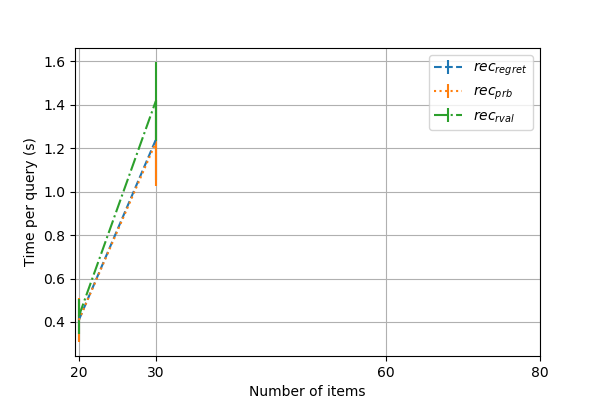

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


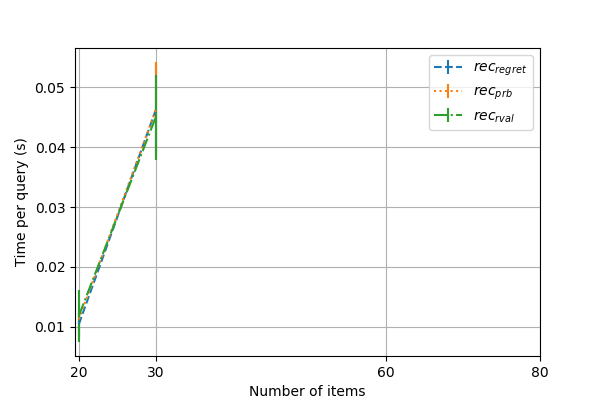

<IPython.core.display.Javascript object>

In [23]:
# Time graph on recommenders without filters. One figure for selector
filt = " All"
for voi in vois:
    fig = plt.figure(figsize=(6,4))
    ax = fig.subplots()

    for recom in recommenders:
        x_vals = []
        y_vals = []
        y_err = []
        for num in numerosities_without_filters:
            table = time[num]
            row = table[ (table['recommender'] == recom) & (table['selector'] == voi)]
            
            if not row.empty:
                x_vals.append(num)
                y_vals.append(row.iloc[0].average_time)
                y_err.append(row.iloc[0].stddev_time)

        # ivoi = list(vois).index(voi) + 1
        ax.errorbar(x_vals, y_vals, yerr=y_err, label=recName[recom.strip()], linestyle=recStyle[recom.strip()])        
        ax.set(xlabel='Number of items', xticks=numerosities, ylabel='Time per query (s)')            
        ax.grid()
        ax.legend()
        plt.show()

    # Title of the Fig. 
    title = "time-fig-recommender-time"+ "_" + voi +"-"+ filt + ".pdf"
    fig.savefig(title, pad_inches=0, bbox_inches='tight') 

<IPython.core.display.Javascript object>


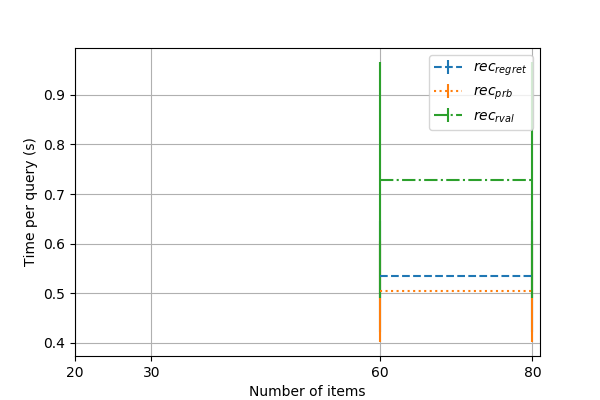

<IPython.core.display.Javascript object>


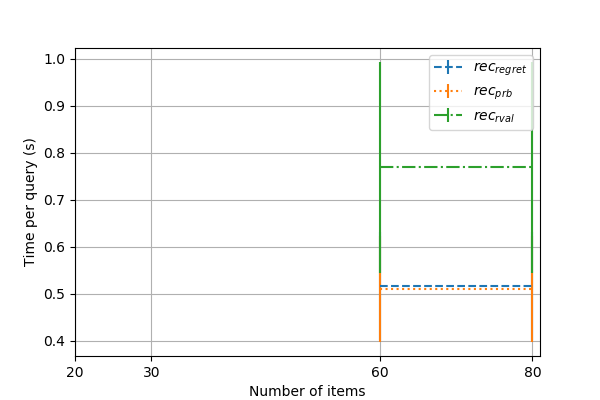

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


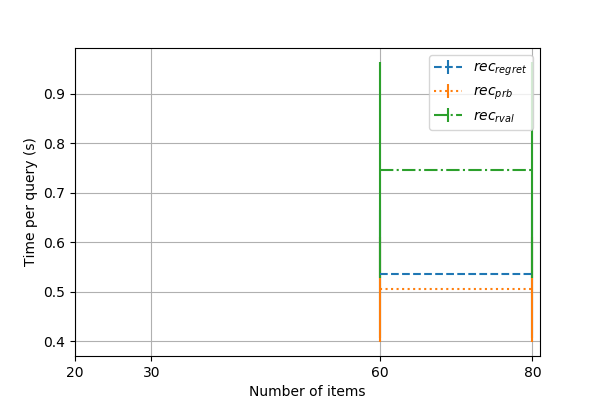

In [24]:
# Time graph on recommenders with filters. One figure for selector
for voi in vois:
    for filt in filters_without_all:
        fig = plt.figure(figsize=(6,4))
        ax = fig.subplots()

        for recom in recommenders:
            x_vals = []
            y_vals = []
            y_err = []
            for num in numerosities_with_filters:
                table = time[num]
                row = table[ (table['recommender'] == recom) & (table['filter'] == filt) & (table['selector'] == voi)]
                #print(row)
                if not row.empty:
                    x_vals.append(num)
                    y_vals.append(row.iloc[0].average_time)
                    y_err.append(row.iloc[0].stddev_time)

            # ivoi = list(vois).index(voi) + 1
            ax.errorbar(x_vals, y_vals, yerr=y_err, label=recName[recom.strip()], linestyle=recStyle[recom.strip()])        
            ax.set(xlabel='Number of items', xticks=numerosities, ylabel='Time per query (s)')            
            ax.grid()
            ax.legend()
            plt.show()

        # Title of the Fig. 
        title = "time-fig-recommender-time"+ "_" + voi +"-"+ filt + ".pdf"
        fig.savefig(title, pad_inches=0, bbox_inches='tight') 